FCN Test accuracy: 0.4684999883174896
CNN Test accuracy: 0.7093999981880188
FCN Training time: 2 minutes and 54 seconds
CNN Training time: 8 minutes and 47 seconds


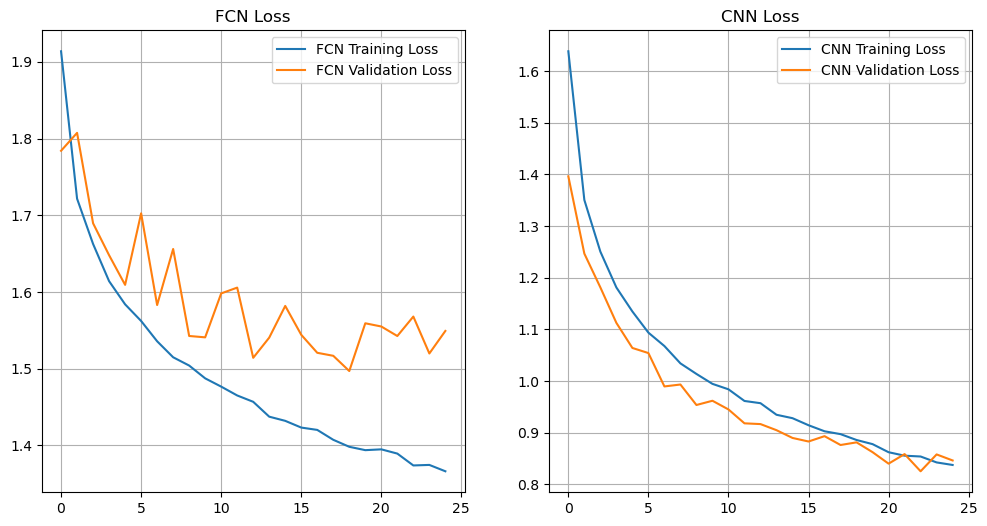

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# FCN results
fcn_results = np.load('fcn_results.npz', allow_pickle=True)
fcn_accuracy = fcn_results['accuracy']
fcn_time = fcn_results['time']
fcn_history = fcn_results['history'].item()

# CNN results
cnn_results = np.load('cnn_results.npz', allow_pickle=True)
cnn_accuracy = cnn_results['accuracy']
cnn_time = cnn_results['time']
cnn_history = cnn_results['history'].item()

fcn_minutes, fcn_seconds = divmod(fcn_time, 60)
cnn_minutes, cnn_seconds = divmod(cnn_time, 60)

# Print results
print(f"FCN Test accuracy: {fcn_accuracy}")
print(f"CNN Test accuracy: {cnn_accuracy}")
print(f"FCN Training time: {int(fcn_minutes)} minutes and {int(fcn_seconds)} seconds")
print(f"CNN Training time: {int(cnn_minutes)} minutes and {int(cnn_seconds)} seconds")

# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fcn_history['loss'], label='FCN Training Loss')
plt.plot(fcn_history['val_loss'], label='FCN Validation Loss')
plt.legend()
plt.grid()
plt.title('FCN Loss')

plt.subplot(1, 2, 2)
plt.plot(cnn_history['loss'], label='CNN Training Loss')
plt.plot(cnn_history['val_loss'], label='CNN Validation Loss')
plt.legend()
plt.grid()
plt.title('CNN Loss')

plt.show()

CIFAR-10 Luokitteluprojekti
Projektin tavoite
Tämän ryhmäprojektin tarkoituksena on soveltaa neuroverkkotekniikoita CIFAR-10 kuvaluokitteluongelmaan. Tavoitteena on vertailla kahta erilaista neuroverkkoarkkitehtuuria: täysin yhdistettyä verkkoa (FCN) sekä konvoluutioneuroverkoa (CNN).

Tehtävänanto
Toteuta CIFAR-10 datasetin luokittelu kahdella erillisellä Jupyter Notebookilla:

Käytä täysin yhdistettyä neuroverkkoa (Fully Connected Network, FCN)
Käytä konvoluutioneuroverkkoa (Convolutional Neural Network, CNN)
Voit käyttää mallina ja pohjana MNIST-datasetille tehtyjä työkirjoja:

MNIST_Keras.ipynb
MNIST_Keras_CNN.ipynb
https://github.com/mikkopere/Neuroverkkoprojekti

Vertaile näiden mallien:

Suorituskykyä (tarkkuus testidatalla)
Oppimiskäyrää (training vs. validation loss)
Parametrien määrää
Opetusaikaa
Visualisoi tuloksia:

Näytä esimerkkikuvia ja mallien luokittelutuloksia
Esitä luokkien todennäköisyysjakaumia
Analysoi väärin luokiteltuja kuvia
Ideoita kokeiltavaksi:

Kokeile erilaisia esikäsittelytekniikoita värikuville
Testaa erilaisia verkkoarkkitehtuureja (kerrosten määrä, neuronien määrä)
Kokeile regularisointitekniikoita (dropout, batch normalization)
Tutki data-augmentation -tekniikoiden vaikutusta
Analysoi miksi CNN yleensä toimii paremmin kuvadatalle kuin FCN. Kuinka suureen tarkkuuteen pääset ei malleilla. Realistiset ja toisaalta kunnianhimoiset tavoitteet eli malleilla voisivat olla:

Fully Connected Network (FCN):

realistinen tavoite 50-55 % tarkkuus
kunnianhmoinen tavoite 57-60 % tarkkuus

Convolutional Neural Network (CNN):

realistinen tavoite 75-80 % tarkkuus
kunnianhimoinen tavoite 82-85 % tarkkuus

170498071/170498071 [==============================] - 22s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

FCN

CNN
